In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('full_grouped.csv')
df2 = df.drop(['New deaths','New recovered','WHO Region'],axis=1)
df2

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases
0,2020-01-22,Afghanistan,0,0,0,0,0
1,2020-01-22,Albania,0,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0,0
4,2020-01-22,Angola,0,0,0,0,0
...,...,...,...,...,...,...,...
27297,2020-06-15,West Bank and Gaza,505,3,415,87,13
27298,2020-06-15,Western Sahara,9,1,8,0,0
27299,2020-06-15,Yemen,844,208,79,557,116
27300,2020-06-15,Zambia,1382,11,1142,229,24


In [3]:
df2['Year'] = pd.DatetimeIndex(df2['Date']).year
df2['Month'] = pd.DatetimeIndex(df2['Date']).month
df2['Day'] = pd.to_datetime(df2['Date']).dt.day
df2.drop(['Date'],axis=1,inplace=True)
df2

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,Year,Month,Day
0,Afghanistan,0,0,0,0,0,2020,1,22
1,Albania,0,0,0,0,0,2020,1,22
2,Algeria,0,0,0,0,0,2020,1,22
3,Andorra,0,0,0,0,0,2020,1,22
4,Angola,0,0,0,0,0,2020,1,22
...,...,...,...,...,...,...,...,...,...
27297,West Bank and Gaza,505,3,415,87,13,2020,6,15
27298,Western Sahara,9,1,8,0,0,2020,6,15
27299,Yemen,844,208,79,557,116,2020,6,15
27300,Zambia,1382,11,1142,229,24,2020,6,15


In [4]:
X = df2.drop(['New cases'],axis=1)
Y = df2['New cases']
X['Country/Region'] = pd.factorize(X['Country/Region'])[0]
X,Y

(       Country/Region  Confirmed  Deaths  Recovered  Active  Year  Month  Day
 0                   0          0       0          0       0  2020      1   22
 1                   1          0       0          0       0  2020      1   22
 2                   2          0       0          0       0  2020      1   22
 3                   3          0       0          0       0  2020      1   22
 4                   4          0       0          0       0  2020      1   22
 ...               ...        ...     ...        ...     ...   ...    ...  ...
 27297             182        505       3        415      87  2020      6   15
 27298             183          9       1          8       0  2020      6   15
 27299             184        844     208         79     557  2020      6   15
 27300             185       1382      11       1142     229  2020      6   15
 27301             186        387       4         54     329  2020      6   15
 
 [27302 rows x 8 columns],
 0          0
 1       

In [5]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2)
X_train,Y_train

(       Country/Region  Confirmed  Deaths  Recovered  Active  Year  Month  Day
 13106              16      13964     828       2132   11004  2020      4    1
 16541              85     178972   23660      47055  108257  2020      4   19
 1298              176          0       0          0       0  2020      1   28
 11335             115         21       0          0      21  2020      3   22
 18101             149         93       4         10      79  2020      4   27
 ...               ...        ...     ...        ...     ...   ...    ...  ...
 21575              70       1763      33        138    1592  2020      5   16
 5390              154          0       0          0       0  2020      2   19
 860               112          0       0          0       0  2020      1   26
 15795              87       8100     146        853    7101  2020      4   15
 23654              92      23267     175       7946   15146  2020      5   27
 
 [21841 rows x 8 columns],
 13106    1189
 16541  

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
regressor.score(X_test,Y_test)

0.6459668531434926

In [8]:
df2['Country/Region'] = pd.factorize(df2['Country/Region'])[0]
dfindia = df2[df2['Country/Region']==79]
x_india = dfindia.drop(['New cases'],axis=1)
y_india = dfindia['New cases']
y_pred_india = regressor.predict(x_india)
dataframe = pd.DataFrame({'Actual Value':y_india,'Predicted':y_pred_india})
dataframe

,Actual Value,Predicted
79,0,28.010311
266,0,29.705014
453,0,31.399717
640,0,33.094419
827,0,34.789122
...,...,...
26446,10930,5321.839858
26633,11458,5481.839858
26820,11929,5649.839858
27007,11502,5813.721460


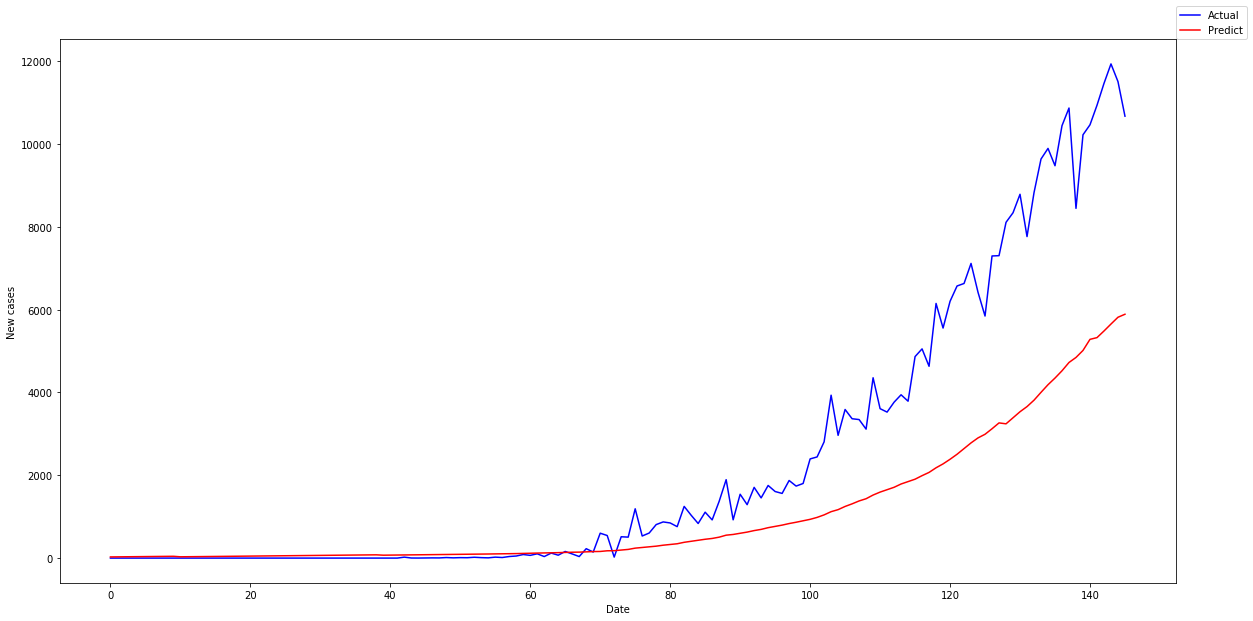

In [9]:
fig , ax = plt.subplots(figsize=(20,10))
val = np.arange(0,len(dataframe),1)
ax.plot(val,dataframe['Actual Value'],c='b',label='Actual')
ax.plot(val,dataframe['Predicted'],c='r',label='Predict')
ax.set_xlabel('Date')
ax.set_ylabel('New cases')
ax.legend(loc=(1,1));